In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
     

In [2]:
data = pd.read_csv("New Dataset 5000.csv")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import os
import shutil
import pickle as pk

from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [4]:
df = data.drop(['StationId', 'Datetime', 'AQI_Bucket'], axis=1)
df

PM2.5    PM10     NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  \
0     35.25   88.50   2.12   33.10  19.30  14.10  0.96  1.97  67.25     4.98   
1     32.00   73.50   2.17   20.30  12.60  13.80  0.17  2.77  80.75     3.40   
2     20.50   58.00   3.00   17.35  11.65  13.48  1.53  2.95  77.22     2.02   
3     21.00   50.00   2.73   18.28  11.93  13.50  2.96  2.02  36.35     1.42   
4     18.50   43.50   2.20   16.38  10.45  15.13  3.49  2.20  70.90     1.20   
...     ...     ...    ...     ...    ...    ...   ...   ...    ...      ...   
5086  40.75   93.75   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30   
5087  64.25  151.75   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22   
5088  82.25  179.50  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55   
5089  78.25  165.00  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62   
5090  75.50  160.75  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65   

      Toluene  Xylene  AQI  
0        7.43    2.70  168  
1        4.27    1.57  124  
2        2.55    1.18  124  
3        1.57    0.80  124  
4        1.10    1.03  124  
...       ...     ...  ...  
5086     7.35    3.00  106  
5087    16.48    8.20  106  
5088    23.40   12.93  106  
5089    24.93   15.65  107  
5090    22.52   15.62  108  

[5091 rows x 13 columns]

In [5]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4072, 10)
(4072,)
(1019, 10)
(1019,)


In [8]:
sc=StandardScaler()

scaler = sc.fit(X_train)

trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=11, input_dim=10, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=128, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(trainX_scaled, y_train ,batch_size = 20, epochs = 100, verbose=1)

Epoch 1/100
204/204 [==============================] - 0s 588us/step - loss: 7915.7739
Epoch 2/100
204/204 [==============================] - 0s 520us/step - loss: 3389.9082
Epoch 3/100
204/204 [==============================] - 0s 525us/step - loss: 2105.8496
Epoch 4/100
204/204 [==============================] - 0s 480us/step - loss: 1290.5157
Epoch 5/100
204/204 [==============================] - 0s 523us/step - loss: 801.5639
Epoch 6/100
204/204 [==============================] - 0s 518us/step - loss: 615.6804
Epoch 7/100
204/204 [==============================] - 0s 512us/step - loss: 518.8816
Epoch 8/100
204/204 [==============================] - 0s 533us/step - loss: 460.1643
Epoch 9/100
204/204 [==============================] - 0s 517us/step - loss: 423.0464
Epoch 10/100
204/204 [==============================] - 0s 508us/step - loss: 401.5478
Epoch 11/100
204/204 [==============================] - 0s 504us/step - loss: 390.7526
Epoch 12/100
204/204 [==========================

204/204 [==============================] - 0s 471us/step - loss: 309.2289
Epoch 96/100
204/204 [==============================] - 0s 574us/step - loss: 310.1411
Epoch 97/100
204/204 [==============================] - 0s 580us/step - loss: 309.5208
Epoch 98/100
204/204 [==============================] - 0s 482us/step - loss: 308.0154
Epoch 99/100
204/204 [==============================] - 0s 489us/step - loss: 308.7207
Epoch 100/100
204/204 [==============================] - 0s 572us/step - loss: 308.6075


In [10]:
model.evaluate(testX_scaled, y_test)

32/32 [==============================] - 0s 15us/step - loss: 336.6472


336.6472473144531

In [11]:
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [12]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   74.235809
1         65   74.086899
2         45   63.610332
3        142  123.997993
4        126  104.402206
...      ...         ...
1014     139  124.066254
1015      45   46.465206
1016      94  130.279465
1017      60   95.046097
1018      36   56.743004

[1019 rows x 2 columns]

In [13]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 80.66865123848251


Actual   Predicted        APE
0      59   74.235809  25.823406
1      65   74.086899  13.979844
2      45   63.610332  41.356294
3     142  123.997993  12.677469
4     126  104.402206  17.141106

In [14]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 13.938265677874174
Mean Squared Error: 336.6472529652715
Root Mean Squared Error: 18.347949557519268
Mean Absolute Percentage Error: 0.19331348761517472
r2 score : 0.7911081631820404


In [21]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[10, 20, 30, 40, 50]
    epoch_list  =   [10, 50, 100, 200, 2000]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=11, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy'])], ignore_index=True)

    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 10 - epochs: 10 Accuracy: 32.609446503570666
2 Parameters: batch_size: 10 - epochs: 50 Accuracy: 35.04483400337557
3 Parameters: batch_size: 10 - epochs: 100 Accuracy: 34.246205589130625
4 Parameters: batch_size: 10 - epochs: 200 Accuracy: 32.10811544006171
5 Parameters: batch_size: 10 - epochs: 2000 Accuracy: 32.71648978366292
6 Parameters: batch_size: 20 - epochs: 10 Accuracy: 34.16111703609667
7 Parameters: batch_size: 20 - epochs: 50 Accuracy: 32.91870366069004
8 Parameters: batch_size: 20 - epochs: 100 Accuracy: 31.160162775446906
9 Parameters: batch_size: 20 - epochs: 200 Accuracy: 30.8999892912057
10 Parameters: batch_size: 20 - epochs: 2000 Accuracy: 31.36603821837663
11 Parameters: batch_size: 30 - epochs: 10 Accuracy: 31.520239277128525
12 Parameters: batch_size: 30 - epochs: 50 Accuracy: 33.21418222067696
13 Parameters: batch_size: 30 - epochs: 100 Accuracy: 33.6279987078337
14 Parameters: batch_size: 30 - epochs: 200 Accuracy: 29.28834695489354
15 

<AxesSubplot:xlabel='Parameters'>

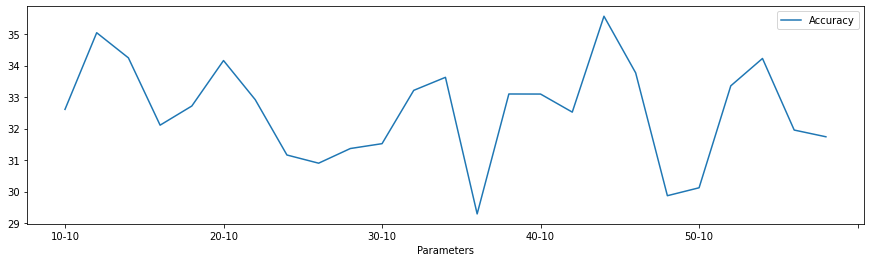

In [22]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [24]:
# Fitting the ANN to the Training set
history = model.fit(trainX_scaled, y_train ,batch_size = 40, epochs = 100, verbose=0)

# Generating Predictions on testing data
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [25]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   64.338295
1         65   60.839142
2         45   66.971901
3        142  112.008163
4        126  107.200096
...      ...         ...
1014     139  127.457954
1015      45   44.074554
1016      94  124.962196
1017      60   98.207771
1018      36   65.696426

[1019 rows x 2 columns]

In [26]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 81.8892334381116


Actual   Predicted        APE
0      59   64.338295   9.047958
1      65   60.839142   6.401320
2      45   66.971901  48.826447
3     142  112.008163  21.121012
4     126  107.200096  14.920559

In [27]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 13.460227571362017
Mean Squared Error: 337.8617757552787
Root Mean Squared Error: 18.381016722566756
Mean Absolute Percentage Error: 0.181107665618884
r2 score : 0.7903545437949009


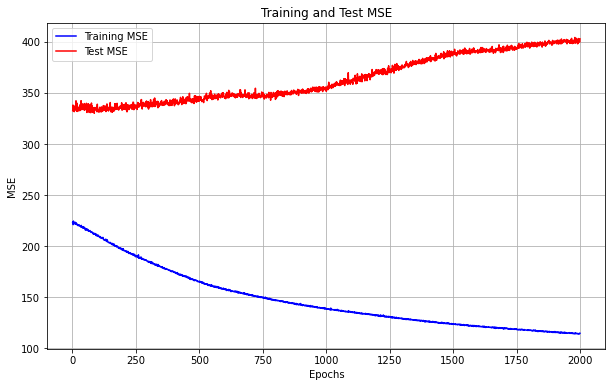

In [29]:
history = model.fit(trainX_scaled, y_train, batch_size=30, epochs=2000, verbose=0, validation_data=(testX_scaled, y_test))

train_mse = history.history['loss']
test_mse = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plotting the MSE for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

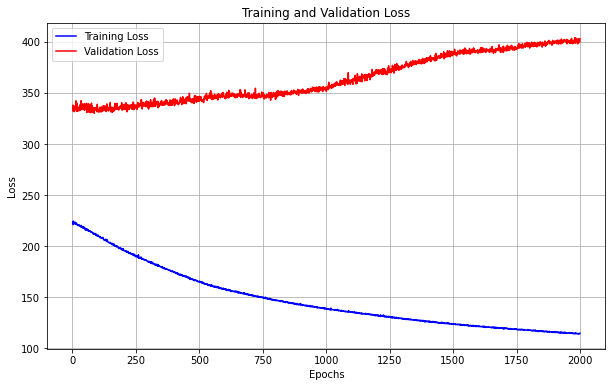

In [30]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the loss for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()